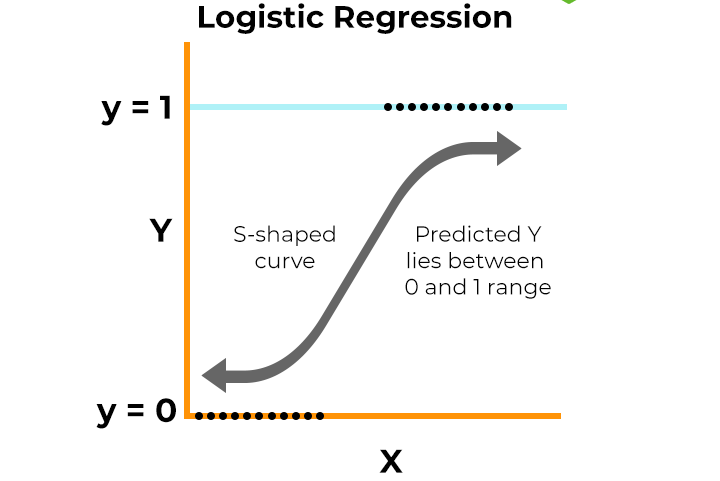

In [2]:
from IPython.display import display,Image

display(Image(filename="Logistic-Regression.png"))

# **sigmoid function**:

The sigmoid function is:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Here are some example values:

| $x$ | $\sigma(x)$ (approx) |
| --- | -------------------- |
| -3  | 0.047                |
| -2  | 0.119                |
| -1  | 0.269                |
| 0   | 0.500                |
| 1   | 0.731                |
| 2   | 0.881                |
| 3   | 0.953                |

üëâ Notice:

* For very **negative** $x$, sigmoid ‚Üí **0**
* For very **positive** $x$, sigmoid ‚Üí **1**
* At $x = 0$, sigmoid = **0.5**

# üîπ Logistic Regression 

The prediction is a probability:

$$
p = \frac{1}{1 + e^{-z}}
$$

where

$$
z = b_0 + b_1x
$$

---

### üîπ What this means

* $x$ = your input (like ‚Äúhours studied‚Äù)
* $b_0$ = a starting value (intercept)
* $b_1$ = how strongly $x$ affects the outcome
* $p$ = probability of ‚ÄúYes‚Äù (between 0 and 1)

---

### üîπ Tiny example

Say:

$$
z = -2 + 0.5 \times x
$$

* If $x = 0$ (0 hours studied):

  $$
  p = \frac{1}{1+e^{-(-2)}} = 0.12 \quad (12\% \text{ chance of pass})
  $$

* If $x = 5$ (5 hours studied):

  $$
  p = \frac{1}{1+e^{-(0.5)}} = 0.62 \quad (62\% chance of pass)
  $$

* If $x = 10$ (10 hours studied):

  $$
  p = \frac{1}{1+e^{-(3)}} = 0.95 \quad (95\% chance of pass)
  $$

---

üëâ So the math is just:

1. Make a line: $z = b_0 + b_1x$
2. Pass it through the squashing function: $p = \frac{1}{1+e^{-z}}$
3. You get a probability between **0 and 1**.

# Cost function for Logistic Regression is Log loss / Cross Entropy

### **MSE (Mean Squared Error)** is **not a good choice** for logistic regression:

### 1. Linear regression with MSE

For linear regression, the hypothesis is

$$
\hat{y} = w^Tx + b
$$

and the cost is

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2
$$

This cost is **quadratic in $w$ and $b$** ‚Üí it‚Äôs convex (a nice bowl shape).
Gradient descent converges smoothly to the global minimum.

---

### 2. Logistic regression with MSE

For logistic regression, the hypothesis is **sigmoid**:

$$
\hat{y} = \sigma(w^Tx + b) = \frac{1}{1 + e^{-(w^Tx+b)}}
$$

If you plug this into MSE:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2
$$

üëâ The problem:

* The sigmoid is **nonlinear**.
* Squaring it makes the cost function **non-convex** (not bowl-shaped).
* This means gradient descent can get **stuck in local minima** or oscillate instead of steadily descending.

---

### 3. Why cross-entropy is better

The **log loss (cross-entropy)** cost function aligns perfectly with the sigmoid:

$$
J(w, b) = -\frac{1}{m}\sum_{i=1}^m \Big[y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)}) \Big]
$$

* This function is **convex** in logistic regression.
* Gradient descent finds the **global minimum** reliably.
* It also matches the probabilistic interpretation (maximum likelihood estimation).

---

üëâ In short:

* **MSE + logistic regression ‚Üí non-convex, bad gradients**
* **Cross-entropy + logistic regression ‚Üí convex, clean gradient descent**

# Perfomance Meterics for Classification
## Confusion matrix , Accuracy , Precision , Recall 

### Example: Email Spam Classifier

We test the model on **20 emails**.

Here‚Äôs the **confusion matrix**:

|                     | Predicted Spam | Predicted Not Spam |
| ------------------- | -------------- | ------------------ |
| **Actual Spam**     | **6 (TP)**     | **4 (FN)**         |
| **Actual Not Spam** | **2 (FP)**     | **8 (TN)**         |

---

### Step 1: Accuracy

$$
\text{Accuracy} = \frac{TP + TN}{Total}
= \frac{6 + 8}{20} = \frac{14}{20} = 70\%
$$

‚úÖ Model is correct 70% of the time.

---

### Step 2: Precision

$$
\text{Precision} = \frac{TP}{TP + FP}
= \frac{6}{6 + 2} = \frac{6}{8} = 75\%
$$

‚úÖ Of the emails marked spam, 75% really were spam.

---

### Step 3: Recall

$$
\text{Recall} = \frac{TP}{TP + FN}
= \frac{6}{6 + 4} = \frac{6}{10} = 60\%
$$

‚úÖ The model found 60% of all real spam emails.

---

### Summary (easy words)

* **Accuracy (70%)** ‚Üí Overall correctness.
* **Precision (75%)** ‚Üí When it said ‚Äúspam,‚Äù it was usually right.
* **Recall (60%)** ‚Üí It still missed quite a few real spam emails.

---

üëâ That‚Äôs why in imbalanced cases (like spam detection), **precision and recall** tell us more than accuracy.

Do you want me to also show you how to **combine precision & recall into F1-score** (a single number)?


# Why accuracy fails in imbalanced datasets

* Accuracy just looks at **how many predictions are correct overall**.
* In an imbalanced dataset, one class (like ‚Äúnot spam‚Äù) is much bigger than the other (like ‚Äúspam‚Äù).
* A model can **just guess the big class every time** and still look very accurate.

---

üëâ Example:

* 1000 emails ‚Üí 950 not spam, 50 spam.
* Model says **‚Äúnot spam‚Äù for everything**.
* It‚Äôs right 950 times, wrong 50 times.
* Accuracy = **95%** ‚úÖ
* But the model is **useless** because it never catches spam.

---

‚úÖ That‚Äôs why accuracy alone doesn‚Äôt tell the full story for imbalanced data ‚Äî we also need **precision and recall**.

# Dont confuse between Precision & Recall

‚úÖ **Precision**

* *Out of all predicted positives, how many are actually correct?*
  üëâ Example: If the model predicted 10 emails as spam, and 7 were really spam ‚Üí precision = 70%.

---

‚úÖ **Recall**

* *Out of all actual positives, how many were correctly predicted?*
  üëâ Example: If there were 10 real spam emails, and the model caught 7 ‚Üí recall = 70%.


üëâ Correct version:

* **Precision:** Out of all **predicted positives**, how many are correct.
* **Recall:** Out of all **actual positives**, how many are correctly predicted.

# F- Beta Score

## F1 F0.5 F2 

### The problem

We have **precision** and **recall**:

* Precision = *Of predicted positives, how many were correct?*
* Recall = *Of actual positives, how many did we find?*

But sometimes we don‚Äôt want to treat them equally.
üëâ Example: In your **stock crash prediction**, recall is more important than precision.

---

### The solution: F-beta score

* **F1-score** ‚Üí balances precision and recall equally.
* **F-beta score** ‚Üí lets you decide which one matters more.

How it works:

* If **beta = 1** ‚Üí precision and recall weighted equally (this is F1).
* If **beta > 1** ‚Üí more weight on **recall** (catching positives is more important).
* If **beta < 1** ‚Üí more weight on **precision** (avoiding false alarms is more important).

---

### Example

* **F1** = balanced.
* **F2** = recall is twice as important as precision.
* **F0.5** = precision is twice as important as recall.

---

‚úÖ In short:
**F-beta score = a single number that combines precision and recall, but with flexibility to decide which one matters more.**

# OVR logistic regression

**One-vs-Rest (OVR) logistic regression is a way to handle problems with more than two classes by training one logistic regression model for each class, where that class is treated as ‚Äúyes‚Äù and all other classes are treated as ‚Äúno.‚Äù The final prediction is the class whose model gives the highest probability.**


### Step 1: Build OVR models  
We train **one logistic regression per fruit**:  

- **Model 1:** Apple vs Not Apple  
- **Model 2:** Orange vs Not Orange  
- **Model 3:** Pear vs Not Pear  


### Step 2: Prediction  
Say we give the models a new fruit to classify. Each model outputs a probability:  

- Model 1 (Apple vs Not Apple): **0.6 (60% Apple)**  
- Model 2 (Orange vs Not Orange): **0.3 (30% Orange)**  
- Model 3 (Pear vs Not Pear): **0.1 (10% Pear)**  


### Step 3: Pick the highest  
- Apple: 60%  
- Orange: 30%  
- Pear: 10%  

üëâ The model predicts: **Apple** üçé  


‚úÖ In short:  
With OVR, each fruit gets its own ‚Äúyes or no‚Äù model, and the one with the **highest probability wins**.  


# How To Read Classification Report 

### Example: Spam Email Classifier

We tested the model on **20 emails**.

Here‚Äôs the **confusion matrix** again for clarity:

|                     | Predicted Spam | Predicted Not Spam |
| ------------------- | -------------- | ------------------ |
| **Actual Spam**     | 6 (TP)         | 4 (FN)             |
| **Actual Not Spam** | 2 (FP)         | 8 (TN)             |

---

### Classification Report (simplified)

| Class         | Precision | Recall | F1-score | Support |
| ------------- | --------- | ------ | -------- | ------- |
| Spam          | 0.75      | 0.60   | 0.67     | 10      |
| Not Spam      | 0.67      | 0.80   | 0.73     | 10      |
| **Avg/Total** | 0.71      | 0.70   | 0.70     | 20      |

---

### How to read this

1. **Spam row**

   * Precision = 0.75 ‚Üí When the model said *spam*, it was right 75% of the time.
   * Recall = 0.60 ‚Üí Out of all real spam emails, it caught 60%.
   * F1 = 0.67 ‚Üí Balance between precision and recall.
   * Support = 10 ‚Üí There were 10 real spam emails.

2. **Not Spam row**

   * Precision = 0.67 ‚Üí When the model said *not spam*, it was right 67% of the time.
   * Recall = 0.80 ‚Üí Out of all real not spam emails, it caught 80%.
   * F1 = 0.73 ‚Üí Balance between precision and recall.
   * Support = 10 ‚Üí There were 10 real not spam emails.

3. **Avg/Total row**

   * Shows the **overall performance**.
   * Here, F1 \~ 0.70 ‚Üí The model is okay, but not great.

---

‚úÖ Quick takeaway from this report:

* The model is **better at finding not spam** (recall = 80%) than finding spam (recall = 60%).
* It sometimes misses real spam (false negatives are a bit high).

# Why Threshold is imp in Logistic Regression

### Logistic regression

It doesn‚Äôt say just ‚ÄúYes‚Äù or ‚ÄúNo.‚Äù
It gives a **chance** (like 30%, 60%, 90%).

---

### Threshold

The threshold is the **cutoff** where we decide:

* If chance ‚â• threshold ‚Üí say ‚ÄúYes.‚Äù
* If chance < threshold ‚Üí say ‚ÄúNo.‚Äù

Default cutoff = **50%**.

---

### Real-world examples

1. **Spam emails**

* Threshold 50% ‚Üí mark email as spam only if chance ‚â• 50%.
* Threshold 30% ‚Üí mark more emails as spam (catch more spam, but may flag normal emails too).

2. **Medical test**

* Threshold 20% ‚Üí even a small chance ‚Üí call it sick (better safe than sorry).
* Threshold 70% ‚Üí only call sick if very sure (risk missing some patients).

3. **Stock market crash**

* Lower threshold = warn earlier (more warnings, even false ones).
* Higher threshold = warn only if very sure (may miss real crashes).

---

‚úÖ Super short:
**Threshold = the cutoff that decides when the model says ‚ÄúYes.‚Äù Lower threshold = more yes‚Äôs (catch more but risk false alarms). Higher threshold = fewer yes‚Äôs (miss some but more confident).**

## Problem with thresholds

In logistic regression, we must pick a **threshold** (like 0.5) to decide ‚ÄúYes‚Äù or ‚ÄúNo.‚Äù
But the model might perform differently if we choose 0.3, 0.5, or 0.7.

So‚Ä¶ how do we know **overall** if the model is good, no matter what threshold we pick?

---

### What ROC curve does

The **ROC curve** shows how well the model works across **all possible thresholds**.

* If the curve goes **towards the top-left corner**, the model is good at separating Yes vs No.
* If the curve looks like a **diagonal line**, the model is basically guessing.

---

### What AUC is

The **AUC** is just the **score** from that curve.

* **1.0 = perfect model** (always right).
* **0.5 = useless model** (random guessing).
* **Closer to 1 = better model.**

---

‚úÖ In short:
**The ROC curve shows how good your model is at all cutoffs, and AUC is one number (0‚Äì1) that tells you how strong the model is overall.**

# AUC-ROC Curve

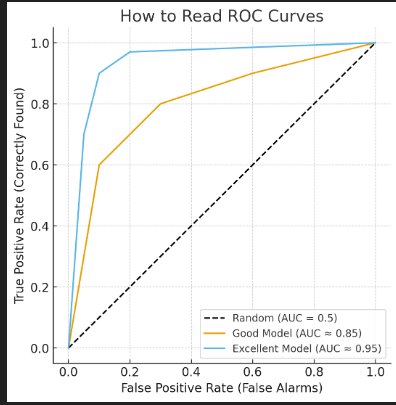

In [7]:
from IPython.display import Image, display

display(Image(filename="ROC-AUC.png"))

* **Diagonal line** = random guessing (bad).
* **Good model** = curve bends toward top-left.
* **Excellent model** = curve hugs the top-left corner even more.

üëâ The closer the curve is to the **top-left corner**, the better the model.

Want me to also show you how the **AUC numbers** (like 0.7, 0.85, 0.95) match these curves?


# TPR vs FPR

### ‚úÖ True Positive Rate (TPR)

üëâ TPR tells you:
**‚ÄúOut of all the actual positives, how many did my model correctly catch?‚Äù**

* Example: A medical test for a disease.

  * If 100 people actually have the disease, and the test correctly finds 90 ‚Üí
    TPR = 90 / 100 = **0.9 (90%)**
* High TPR = your model doesn‚Äôt miss many positives.



### ‚úÖ False Positive Rate (FPR)

üëâ FPR tells you:
**‚ÄúOut of all the actual negatives, how many did my model wrongly flag as positive?‚Äù**

* Example: Same medical test.

  * If 100 healthy people are tested, and the test wrongly says 20 are sick ‚Üí
    FPR = 20 / 100 = **0.2 (20%)**
* Low FPR = your model doesn‚Äôt raise too many false alarms.



### üåü Put together:

* **TPR (sensitivity/recall)** = How *good* the model is at catching positives.
* **FPR** = How *annoying* the model is by giving false alarms.


üëâ So, the **ROC curve** is basically showing you:
‚ÄúHow good is my model at catching positives **while keeping false alarms low**?‚Äù

# üîπ Scenario

Imagine we build a model to predict whether **a student passes an exam** (Positive = Pass, Negative = Fail).
We test it on **6 students**:

| Student | Actual (Pass/Fail) | Model‚Äôs Probability of Pass |
| ------- | ------------------ | --------------------------- |
| A       | Pass               | 0.9                         |
| B       | Fail               | 0.8                         |
| C       | Pass               | 0.7                         |
| D       | Fail               | 0.6                         |
| E       | Fail               | 0.4                         |
| F       | Pass               | 0.3                         |

---

## üîπ Step 1: Try different thresholds

We can say: *If probability ‚â• threshold ‚Üí Predict Pass.*
Let‚Äôs test two thresholds:

### Threshold = 0.5

* Predict **Pass** if ‚â• 0.5, otherwise **Fail**.

Predictions:

* A (0.9 ‚Üí Pass ‚úÖ correct)
* B (0.8 ‚Üí Pass ‚ùå wrong, false alarm)
* C (0.7 ‚Üí Pass ‚úÖ correct)
* D (0.6 ‚Üí Pass ‚ùå wrong, false alarm)
* E (0.4 ‚Üí Fail ‚úÖ correct)
* F (0.3 ‚Üí Fail ‚ùå wrong, missed pass)

Result:

* Caught 2 out of 3 passes ‚Üí **TPR = 2/3 = 0.67**
* Wrongly flagged 2 out of 3 fails ‚Üí **FPR = 2/3 = 0.67**

---

### Threshold = 0.7

* Predict **Pass** if ‚â• 0.7, otherwise **Fail**.

Predictions:

* A (0.9 ‚Üí Pass ‚úÖ correct)
* B (0.8 ‚Üí Pass ‚ùå wrong, false alarm)
* C (0.7 ‚Üí Pass ‚úÖ correct)
* D (0.6 ‚Üí Fail ‚úÖ correct)
* E (0.4 ‚Üí Fail ‚úÖ correct)
* F (0.3 ‚Üí Fail ‚ùå wrong, missed pass)

Result:

* Caught 2 out of 3 passes ‚Üí **TPR = 0.67**
* Wrongly flagged 1 out of 3 fails ‚Üí **FPR = 0.33**

---

## üîπ Step 2: ROC Curve

Each threshold gives a point (FPR, TPR).

* Threshold 0.5 ‚Üí (0.67, 0.67)
* Threshold 0.7 ‚Üí (0.33, 0.67)
* Threshold 1.0 (predict all Fail) ‚Üí (0, 0)
* Threshold 0.0 (predict all Pass) ‚Üí (1, 1)

Connect those ‚Üí ROC curve.

---

## üîπ Step 3: AUC

AUC = area under this curve.

* If AUC ‚âà 1 ‚Üí great model.
* If AUC ‚âà 0.5 ‚Üí just guessing.

In our toy case, AUC will be somewhere around **0.8** (pretty good).

---

## üîπ Step 4: Pick a threshold

Let‚Äôs say **we want fewer false alarms** (don‚Äôt want to wrongly say fails are passes).
üëâ Threshold **0.7** is better than 0.5:

* Same ability to catch passes (TPR = 0.67).
* But fewer false alarms (FPR = 0.33 vs. 0.67).

---

‚ú® So here:

* **ROC‚ÄìAUC tells us overall the model is decent.**
* **Threshold 0.7** is a good choice for balance.


### Threshhold value is particularly decided by the domain expertise ,but just keep an idea in mind 